# Tarea Eficiencia Energética

## a) PCI de GLP
Para determinar el poder calorífico del GLP, debemos considerar la combustión perfecta con $\ce{O2}$.

Para el PCI
\begin{equation}
\ce{ x1C_4H_{10} +x2C_3H_8 + aO2 -> bCO2 + cH2O(g)}
\end{equation}

In [ ]:
!pip install cantera

In [ ]:
# importamos
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
water = ct.Water()
gas=ct.Solution("gri30.yaml")

comb_gas = ct.Solution("/content/combustion_gases.yaml")
gas.basis = 'molar'   # establecemos base molar por defecto
comb_gas.basis="molar"



In [ ]:
#balance
N_c4h10 = 0.5321 #butano
N_c3h8=0.4678 #propano

#balance
b=N_c4h10*4+N_c3h8*3
c=(N_c4h10*10+N_c3h8*8)/2
a=(2*b+c)/2
print(a,b,c)
a_exc=1.4*a



5.79765 3.5318 4.5317


In [ ]:
#asignamos el numero de moles
N_o2 = a
#N productos
N_h2o = c
N_co2 = b

N_fuel=N_c4h10+N_c3h8
N_prod= N_h2o+N_co2

Ahora extraemos las entalpías de cada elemento. Asumimos que el combustible y el $\ce{O2}$ entran por separado a la cámara, cada uno a 25°C y 1 atm. Los productos, en cambio, salen de la cámara como una mezcla a 1 atm y 25°C. Consideramos el agua en estado gaseoso para el PCI.

In [ ]:
#sacamos los h
#estado 1, oxígeno
T1, P1   = 25+273.15, ct.one_atm # condiciones de entrada
gas.TPX=T1,P1, 'O2:%.3f' %(N_o2)
h_o2=gas.h
s_o2=gas.s

#estado 2, combustible
T2, P2   = 25+273.15, ct.one_atm # condiciones de entrada
comb_gas.TPX=T2,P2, 'C4H10:%.3f,C3H8:%.3f' %(N_c4h10,N_c3h8)
h_fuel=comb_gas.h
s_fuel=comb_gas.s
M_fuel=comb_gas.mean_molecular_weight

print(M_fuel)

#estado 3, productos
T3, P3   = 25+273.15, ct.one_atm # condiciones de entrada
gas.TPX=T3,P3, 'CO2:%.3f,H2O:%.3f' %(N_co2,N_h2o)
h_prod=gas.h
s_prod=gas.s

51.559364


In [ ]:
q_pci = N_fuel*h_fuel + N_o2*h_o2 - N_prod*h_prod
print(N_fuel*h_fuel,N_o2*h_o2,N_prod*h_prod)
print('El calor liberado es: %.1f kJ/kmol-fuel' % (q_pci*1E-3))

-107114503.15984121 0.09475291855543456 -2485664454.681399
El calor liberado es: 2378550.0 kJ/kmol-fuel


Para determinar el PCI debemos usar la masa molar del combustible


In [ ]:
PCI = q_pci/M_fuel
print('El poder calorífico inferior (PCI) es: %.2f MJ/kg' % (PCI*1E-6))

El poder calorífico inferior (PCI) es: 46.13 MJ/kg


## Volumen de control 1. Cámara de combustión

In [ ]:
# importamos
import cantera as ct
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
water = ct.Water()
gas=ct.Solution("gri30.yaml")

comb_gas = ct.Solution("/content/combustion_gases.yaml")
gas.basis = 'molar'   # establecemos base molar por defecto
comb_gas.basis="molar"

Consideramos combustión con exceso de aire de 40%.

\begin{equation}
\ce{ x1C_4H_{10} +x2C_3H_8 + a(O2 +3.76N2) -> bCO2 + cH2O(l) + dN2 + eO2}
\end{equation}


In [ ]:
# datos
#potencia quemador
Pot=10E6*4.184/3600 #W
print(Pot/1000)
caudal=4/(60*1000) #m3/s

11.622222222222222


In [ ]:
#balance
N_c4h10 = 0.5321 #butano
N_c3h8=0.4678 #propano

#balance
b=N_c4h10*4+N_c3h8*3
c=(N_c4h10*10+N_c3h8*8)/2
a=(2*b+c)/2
print(a,b,c)
a_exc=1.4*a


5.79765 3.5318 4.5317


In [ ]:
#asignamos el numero de moles
N_air = a_exc*4.76
#N productos
N_h2o = c
N_co2 = b
N_n2 = 3.76*a_exc
N_o2=(2*a_exc-2*b-c)/2

N_fuel=N_c4h10+N_c3h8
N_prod= N_h2o+N_co2+N_n2+N_o2

In [ ]:
#sacamos los h
#estado 1, aire
T1, P1   = 5+273.15, ct.one_atm # condiciones de entrada
gas.TPX=T1,P1, 'O2:1, N2:3.76'
h_air=gas.h
s_air=gas.s
M_air=gas.mean_molecular_weight

#estado 2, combustible
T2, P2   = 25+273.15, ct.one_atm # condiciones de entrada
comb_gas.TPX=T2,P2, 'C4H10:%.3f,C3H8:%.3f' %(N_c4h10,N_c3h8)
h_fuel=comb_gas.h
s_fuel=comb_gas.s

M_fuel=comb_gas.mean_molecular_weight
rho_fuel=comb_gas.density
print(M_fuel)

#estado 3, productos
T3, P3   = None, ct.one_atm # condiciones de entrada
gas.TPX=T3,P3, 'CO2:%.3f,H2O:%.3f,N2:%.3f,O2:%.3f' %(N_co2,N_h2o,N_n2,N_o2)
h_prod=gas.h
s_prod=gas.s
cp_prod=gas.cp
M_prod=gas.mean_molecular_weight
cp_prodm=cp_prod/gas.mean_molecular_weight #J/kgK
viscosity_prod=gas.viscosity
k_prod=gas.thermal_conductivity
density_prod=gas.density
density_prodm=density_prod*M_prod

gas()



51.559364

  gri30:

       temperature   278.15 K
          pressure   1.0132e+05 Pa
           density   1.2492 kg/m^3
  mean mol. weight   28.513 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -2.1526e+06       -6.1378e+07  J
   internal energy       -2.2337e+06       -6.3691e+07  J
           entropy            6971.1        1.9877e+05  J/K
    Gibbs function       -4.0916e+06       -1.1667e+08  J
 heat capacity c_p            1057.6             30155  J/K
 heat capacity c_v            765.97             21840  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2          0.063626          0.056696           -27.552
               H2O          0.070006            0.1108           -129.49
               CO2           0.13328          0.086353      

In [ ]:
#hacemos el balance
qo=(N_fuel*h_fuel+N_air*h_air)-(N_prod*h_prod) #J/kmol-fuel
print("q_o en J/kmol-fuel es:",qo)
#queremos dejarlo en KW
print(N_fuel*h_fuel,N_air*h_air,N_prod*h_prod)
m_fuel=Pot*M_fuel/qo #flujo masico de combustible en kg/s
n_fuel=m_fuel/M_fuel
print("Flujo másico de combustible en kg/s es:", m_fuel)
print("Flujo molar de combustible en kmol/s es:", n_fuel)

q_o en J/kmol-fuel es: 2380897494.321461
-107114503.15984121 -22446748.60376917 -2510458746.0850716
Flujo másico de combustible en kg/s es: 0.0002516842440607558
Flujo molar de combustible en kmol/s es: 4.881445862302642e-06


## Volumen de control 2. Sistema de agua

In [ ]:
#Estado 4, entrada de agua
water = ct.Water()
water.basis= 'mass'
T4,P4=40+273.15,ct.one_atm
water.TP = T4, P4
h_h2o_in=water.h
rho_h2o=water.density
#J/kg

In [ ]:
#Estado 5, salida de agua
water = ct.Water()
water.basis= 'mass'
T5,P5=60+273.15,ct.one_atm
water.TP = T5, P5
h_h2o_out=water.h
#J/kg

In [ ]:
#haciendo balance, queda que:
m_h2o=rho_h2o*caudal #flujo masico de agua, kg/s
print("El flujo másico del agua en kg/s es:",m_h2o)
Q_h2o=m_h2o*(h_h2o_out-h_h2o_in) #calor para calentar el agua
print("El calor necesario para calentar el agua en kW es:",Q_h2o/1000) #kW


El flujo másico del agua en kg/s es: 0.0661511404279007
El calor necesario para calentar el agua en kW es: 5.526993249368426


In [ ]:
#balance de calor
Q_room=Pot-Q_h2o
print(Q_room)

6095.228972853796


In [ ]:
#calculamos eficiencia de descarga

ef=(m_h2o*(h_h2o_out-h_h2o_in))/(m_fuel*PCI)
print("Eficiencia de descarga en % es:",ef*100)

Eficiencia de descarga en % es: 47.60232669673968


## Resistencia a la transferencia de calor predominante en la zona calentamiento (calefacción)

In [ ]:
# Calculo T°
#cp_
print(a_exc)
n_air= N_air*n_fuel/N_fuel #kmol/s
m_air=n_air*M_air
m_prod=m_fuel+m_air
print("Flujo másico de los gases de salida en kg/s es:",m_prod)

8.11671
Flujo másico de los gases de salida en kg/s es: 0.00569344422119124


In [ ]:
delta_T_prod=Q_room/(m_prod*cp_prodm)
print
T_in=T1 #K, Tin,boiler
To_prod=delta_T_prod+T_in
print("Temperatura de salida de gases del boiler en K:",To_prod)

Temperatura de salida de gases del boiler en K: 1290.4389190698853


In [ ]:
cp_prodm

1057.5732852281758

In [ ]:
## Propiedades de productos según temperatura

def prod(temp):
    T3, P3   = temp, ct.one_atm # condiciones de entrada
    gas.TPX=T3,P3, 'CO2:%.3f,H2O:%.3f,N2:%.3f,O2:%.3f' %(N_co2,N_h2o,N_n2,N_o2)
    h_prod=gas.h
    s_prod=gas.s
    cp_prod=gas.cp
    M_prod=gas.mean_molecular_weight
    cp_prodm=cp_prod/gas.mean_molecular_weight #J/kgK
    viscosity_prod=gas.viscosity
    k_prod=gas.thermal_conductivity
    density_prod=gas.density
    density_prodm=density_prod*M_prod
    return h_prod, s_prod, M_prod, cp_prodm, viscosity_prod, k_prod, density_prodm

h_prod, s_prod, M_prod, cp_prodm, viscosity_prod, k_prod, density_prodm = prod(273.15 +5 )
print(h_prod, s_prod, M_prod, cp_prodm, viscosity_prod, k_prod, density_prodm)


-61378324.0774067 198767.98041876283 28.513187521392595 1057.5732852281758 1.6010990350204934e-05 0.023924986150242314 1.2492493535123657


Para calcular el h_interno, asumiremos el caso como convección natural en una pared plana, dado que H>>D.

In [ ]:
#asumimos una To_funnel (salida cañon)
#h interno
Di=3*0.0254
Ai=np.pi*(Di/2)**2
L=2 #m

V=m_prod/(density_prodm*Ai) #m/s
Re=V*Di/viscosity_prod
print("Reynolds es turbulento",Re)

alpha=k_prod/(density_prodm*cp_prodm)
Pr=viscosity_prod/alpha


#usamos la correlacion de dittus-boelter, con calentamiento
Nu=0.023*(Re**0.8)*(Pr**0.4)

hi=Nu*k_prod/Di
print("coeficiente convectivo interno en W/m2K:",hi)
Ais=np.pi*Di*L #superficial
print(Ais)
Rcni=1/(Ais*hi)
print(Rcni) #W/K


Reynolds es turbulento 4756.230443108379
coeficiente convectivo interno en W/m2K: 6.012364651338676
0.4787787204070844
0.347392027639689


In [ ]:
### Cálculo resistencia conductiva
t=0.002
Do=Di+0.002*2
Ao=np.pi*(Do/2)**2
k_ss= 50 #aisi 304, W/mK
Rcd=np.log(Do/Di)/(2*np.pi*k_ss*L)
Rcd #efectivamente, es despreciable


np.float64(8.142693503151515e-05)

In [ ]:
#AIRE HABITACION
#estado 1, aire,casa
Ts=(To_prod+23)/2 #K hay que iterar chiquitines
Tamb=23+273.15 #K

Tf=(Ts+Tamb)/2
Tf, P1   = Tf, ct.one_atm # condiciones de entrada
gas.TPX=Tf,P1, 'O2:1, N2:3.76'
viscosity_airhouse=gas.viscosity
k_airhouse=gas.thermal_conductivity
M_airhouse=gas.mean_molecular_weight

density_airhouse=gas.density
density_airhousem=density_prod*M_airhouse
cp_airhouse=gas.cp
cp_airhousem=cp_airhouse/gas.mean_molecular_weight #J/kgK


In [ ]:
Tf

476.4347297674713

In [ ]:
alpha_airhouse=k_airhouse/(density_airhousem*cp_airhousem)
Pr=viscosity_airhouse/alpha_airhouse
beta=1/Tf

Gr=9.81*beta*(Ts-Tamb)*L**3/(viscosity_airhouse**2)
print(Gr/(10**5))
#asumimos la siguiente correlacion para cilindros verticales
print(beta,Ts-Tamb,viscosity_airhouse)



Nuo=nusselt_external_convection(Gr,Pr)
print(Nuo)
ho=Nuo*k_airhouse/Do
Ao=np.pi*Do*L
Rcno=1/(Ao*ho)
Rcno

874309.552320422
0.002098923393951696 360.56945953494267 2.6063914903292623e-05
63.8904231006027


0.06565372758691089

In [ ]:
#hradiativo
emi=0.7
cboltz=5.67*10**(-8)
qrad=emi*cboltz*(Ts**4-Tamb**4)
hrad=qrad/(Ts-Tamb)
Rrad=1/(hrad*Ao)
hrad, qrad, Rrad

(19.627705772027667, 7077.151262130891, 0.10110583593920253)

In [ ]:
Rext=((1/Rrad)+(1/Rcno))**-1
Rext

0.039805663134635426

In [ ]:
Qw=(To_prod-Tamb)/(Rcni+Rext) #calor util para la habitación,maximo
Qo_funnel=Q_room-Qw
Qo_funnel

To_funnel= To_prod-Qw/(cp_prodm*m_prod)
To_funnel

863.9632110659318

In [ ]:
eta_termica=(Pot-Qo_funnel)/Pot
eta_termica

0.6965022131730333

In [ ]:
#To_prod es dato
Tamb=23+273.15 #K

def nusselt_external_convection(Gr, Pr):
    """

    """
    numerator = 0.387 * (Gr * Pr)**(1/6)
    denominator = (1 + (0.559 / Pr)*(9/16))*(8/27)
    Nu = 0.6 + numerator / denominator
    return Nu





def Rcni(Ts,T_mean_gas):
    T_f = (Ts + T_mean_gas)

    #asumimos una To_funnel (salida cañon)
    #h interno
    Di=3*0.0254
    Ai=np.pi*(Di/2)**2
    L=2 #m

    h_prod, s_prod, M_prod, cp_prodm, viscosity_prod, k_prod, density_prodm = prod(T_f)

    V=m_prod/(density_prodm*Ai) #m/s
    Re=V*Di/viscosity_prod

    alpha=k_prod/(density_prodm*cp_prodm)
    Pr=viscosity_prod/alpha


    #usamos la correlacion de dittus-boelter, con calentamiento
    Nu=0.023*(Re**0.8)*(Pr**0.4)

    hi=Nu*k_prod/Di
    Ais=np.pi*Di*L #superficial
    Rcni=1/(Ais*hi)

    return Rcni

def Rcno(Ts):
    #asumimos una To_funnel (salida cañon)
    Tf = (Ts+Tamb)/2

    h_prod, s_prod, M_prod, cp_prodm, viscosity_prod, k_prod, density_prodm = prod(Tf)
    #h interno
    Di=3*0.0254
    Ai=np.pi*(Di/2)**2
    L=2 #m

    V=m_prod/(density_prodm*Ai) #m/s
    Re=V*Di/viscosity_prod

    alpha=k_prod/(density_prodm*cp_prodm)
    Pr=viscosity_prod/alpha


    #usamos la correlacion de dittus-boelter, con calentamiento
    Nu=0.023*(Re**0.8)*(Pr**0.4)

    hi=Nu*k_prod/Di
    Ais=np.pi*Di*L #superficial
    Rcni=1/(Ais*hi)

    return Rcni

def Rrad(Ts):
    emi=0.7
    cboltz=5.67*10**(-8)
    qrad=emi*cboltz*(Ts**4-Tamb**4)
    hrad=qrad/(Ts-Tamb)
    Rrad=1/(hrad*Ao)

    return Rrad



def temp_funnel(To_funnel):
    T_mean_gas = (To_prod + To_funnel)/2
    Ts = (T_mean_gas + Tamb)/2
    #print("r's: ", Rcni(Ts,T_mean_gas),(Rcno(Ts)),(Rrad(Ts)))
    R_t = Rcni(Ts,T_mean_gas) + 1/(1 / (Rcno(Ts)) + 1/(Rrad(Ts))) #radiativa interna despreciable
    #print("r total: ", R_t)
    Qw=(T_mean_gas-Tamb)/(R_t)

    h_prod, s_prod, M_prod, cp_prodm, viscosity_prod, k_prod, density_prodm = prod(T_mean_gas)
    To_funnel= To_prod-Qw/(cp_prodm*m_prod)
    eta_termica = (Pot-(Q_room-Qw))/Pot

    return Qw, To_funnel, eta_termica


T_funnel_iterado =[(1000)]
Q_w_iterado = [0]
eta_iterado = [1]
for i in range(30):
    k = temp_funnel(T_funnel_iterado[-1])
    T_funnel_iterado.append(k[1])
    Q_w_iterado.append(k[0])
    eta_iterado.append(k[2])




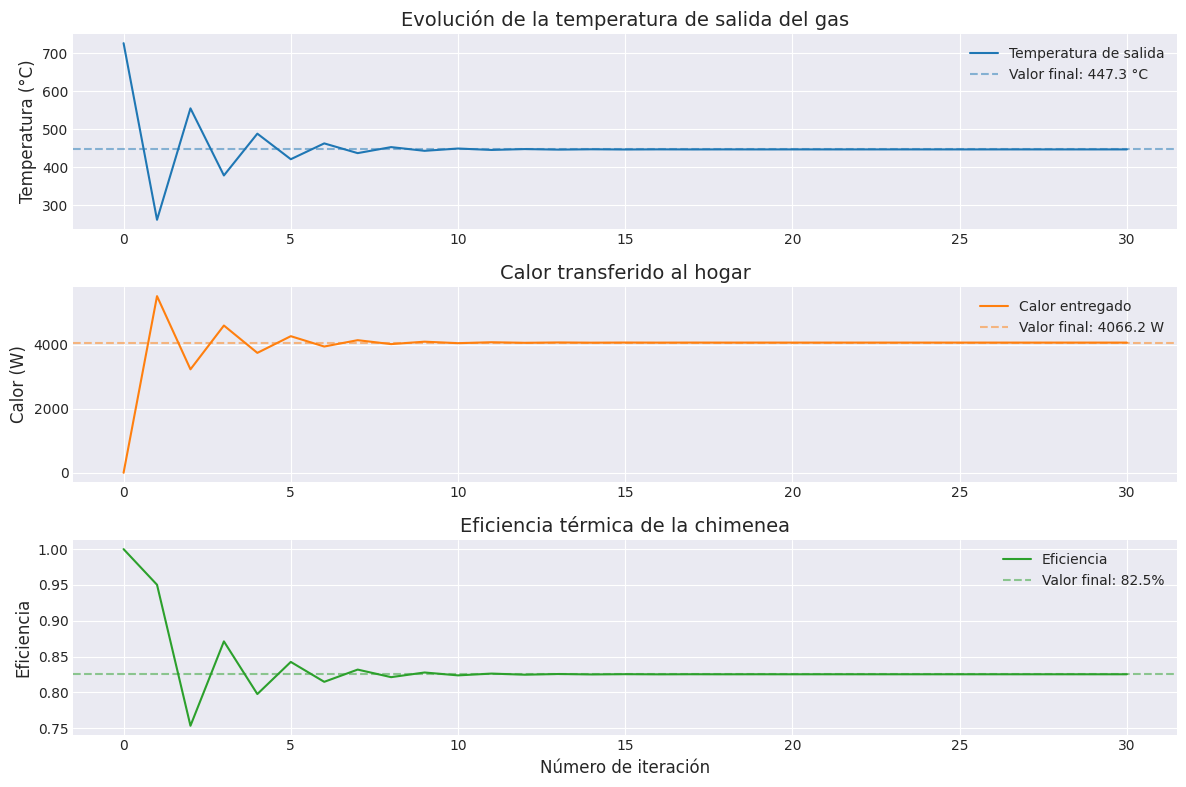

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Paleta de colores atractiva
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Crear figura con 3 subplots
plt.figure(figsize=(12, 8))

# Subplot 1: Temperatura de salida
plt.subplot(3, 1, 1)
plt.plot(np.array(T_funnel_iterado)-273.15, color=colors[0], label='Temperatura de salida')
plt.axhline(y=T_funnel_iterado[-1]-273.15, color=colors[0], linestyle='--', alpha = .5,
            label=f'Valor final: {T_funnel_iterado[-1]-273.15:.1f} °C')
plt.ylabel('Temperatura (°C)')
plt.title('Evolución de la temperatura de salida del gas')
plt.grid(True)
plt.legend()

# Subplot 2: Calor entregado al hogar
plt.subplot(3, 1, 2)
plt.plot(Q_w_iterado, color=colors[1], label='Calor entregado')
plt.axhline(y=Q_w_iterado[-1], color=colors[1], linestyle='--', alpha = .5,
            label=f'Valor final: {Q_w_iterado[-1]:.1f} W')
plt.ylabel('Calor (W)')
plt.title('Calor transferido al hogar')
plt.grid(True)
plt.legend()

# Subplot 3: Eficiencia térmica
plt.subplot(3, 1, 3)
plt.plot(eta_iterado, color=colors[2], label='Eficiencia')
plt.axhline(y=eta_iterado[-1], color=colors[2], linestyle='--', alpha = .5,
            label=f'Valor final: {eta_iterado[-1]*100:.1f}%')
plt.xlabel('Número de iteración')
plt.ylabel('Eficiencia')
plt.title('Eficiencia térmica de la chimenea')
plt.grid(True)
plt.legend()


plt.tight_layout()
fig.suptitle('Análisis de rendimiento de la chimenea', fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.92)


# Ajustar espacios entre subplots
plt.tight_layout()
plt.show()

In [2]:
print("Prueba para ver si GH funciona")

Prueba para ver si GH funciona
